In [120]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [121]:
#load the train dataset
df=pd.read_csv('D:/machine learning/Loan Prediction/train_ctrUa4K.csv')  
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [122]:
#Load the test dataset
df1=pd.read_csv('D:/machine learning/Loan Prediction/test_lAUu6dG.csv') 
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [123]:
df.shape #for train

(614, 13)

In [124]:
df1.shape #for test

(367, 12)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 24.4+ KB


In [127]:
#view basic statistical details
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [128]:
#to check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [130]:
#to check null values
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [131]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [132]:
df['Gender'].describe() #categorical data


count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

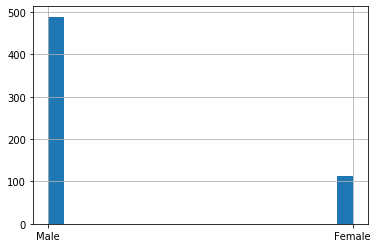

In [133]:
df['Gender'].hist(bins = 20)

In [134]:
#replacing NaN values
df['Gender']=df['Gender'].replace(np.nan,'Male')

In [135]:
#encoding the target variable
encode = LabelEncoder()
df.Gender = encode.fit_transform(df.Gender)

In [136]:
df['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

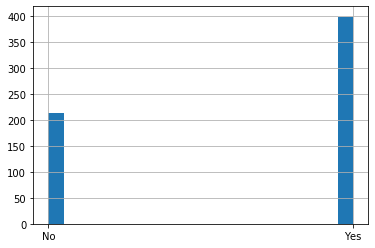

In [137]:
df['Married'].hist(bins = 20)

In [138]:
#replacing NaN values
df['Married']=df['Married'].replace(np.nan,'No')

In [139]:
#encoding the target variable
encode = LabelEncoder()
df.Married = encode.fit_transform(df.Married)

In [140]:
df['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

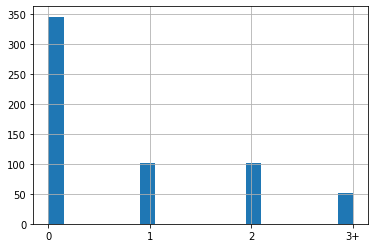

In [141]:
df['Dependents'].hist(bins = 20)

In [142]:
#replacing NaN values
df['Dependents']=df['Dependents'].replace(np.nan,'0')

In [143]:
df['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

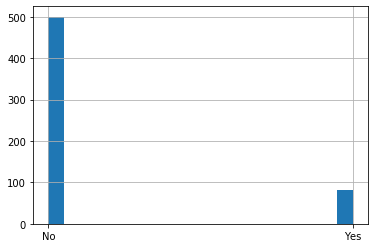

In [144]:
df['Self_Employed'].hist(bins = 20)

In [145]:
#replacing NaN values
df['Self_Employed']=df['Self_Employed'].replace(np.nan,'No')

In [146]:
#encoding the target variable
encode = LabelEncoder()
df.Self_Employed = encode.fit_transform(df.Self_Employed)

In [147]:
df['LoanAmount'].describe() #numerical data

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

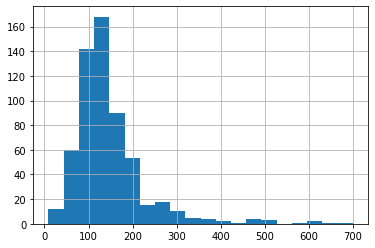

In [148]:
df['LoanAmount'].hist(bins = 20)

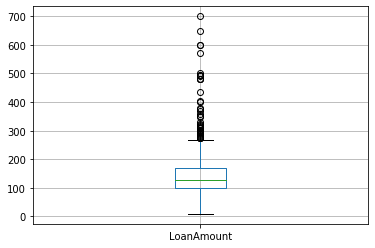

In [149]:
#boxplot
df.boxplot(column='LoanAmount')

In [150]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [151]:
#log transformation
df['LoanAmount_1'] = np.log(df['LoanAmount'])

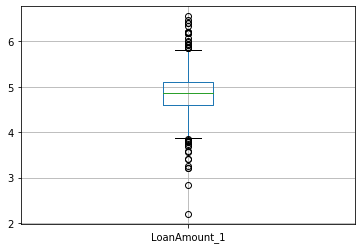

In [152]:
df.boxplot(column='LoanAmount_1')

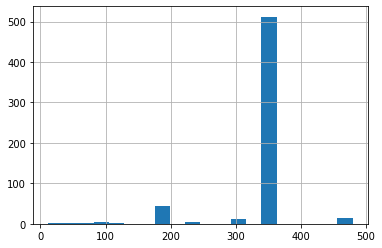

In [153]:
df['Loan_Amount_Term'].hist(bins = 20)

In [154]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

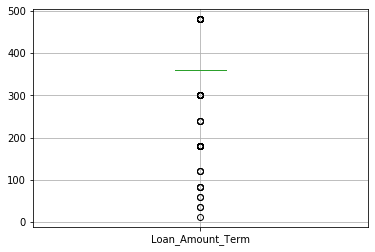

In [155]:
df.boxplot(column ='Loan_Amount_Term')

In [156]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [157]:
#log transformation
df['Loan_Amount_Term_1'] = np.log(df['Loan_Amount_Term'])

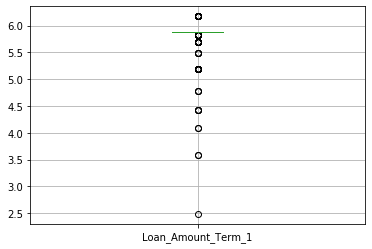

In [158]:
df.boxplot(column = 'Loan_Amount_Term_1')

In [159]:
df['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

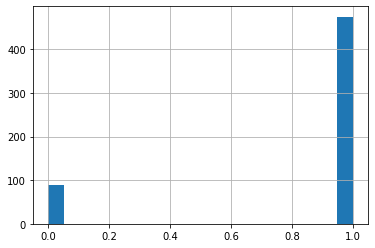

In [160]:
df['Credit_History'].hist(bins = 20)

In [161]:
df['Credit_History'].fillna(0,inplace=True)

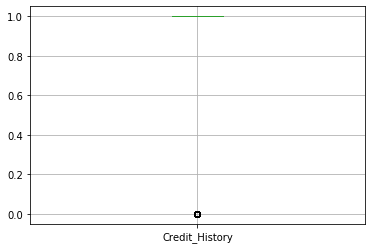

In [162]:
df.boxplot(column = 'Credit_History')

In [163]:
df1['Gender'].describe()

count      356
unique       2
top       Male
freq       286
Name: Gender, dtype: object

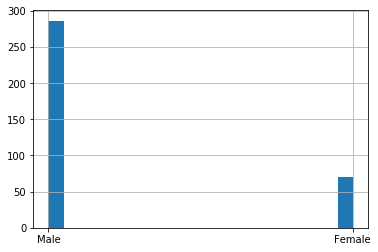

In [164]:
df1['Gender'].hist(bins = 20)

In [165]:
#replacing NaN values
df1['Gender']=df1['Gender'].replace(np.nan,'Male')

In [166]:
#encoding the target variable
encode = LabelEncoder()
df1.Gender = encode.fit_transform(df1.Gender)

In [167]:
df1['Dependents'].describe()

count     357
unique      4
top         0
freq      200
Name: Dependents, dtype: object

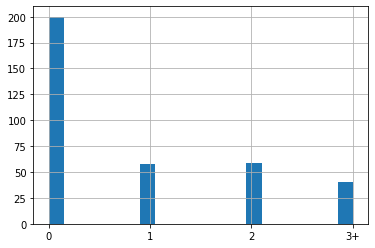

In [168]:
df1['Dependents'].hist(bins = 20)

In [169]:
#replacing NaN values
df1['Dependents']=df['Dependents'].replace(np.nan,'0')

In [170]:
df1['Self_Employed'].describe()

count     344
unique      2
top        No
freq      307
Name: Self_Employed, dtype: object

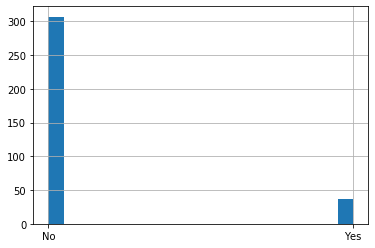

In [171]:
df1['Self_Employed'].hist(bins = 20)

In [172]:
#replacing NaN values
df1['Self_Employed']=df['Self_Employed'].replace(np.nan,'No')

In [173]:
#encoding the target variable
encode = LabelEncoder()
df1.Self_Employed = encode.fit_transform(df1.Self_Employed)

In [174]:
df1['LoanAmount'].describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64

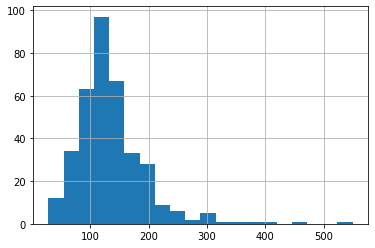

In [175]:
df1['LoanAmount'].hist(bins = 20)

In [176]:
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(),inplace=True)

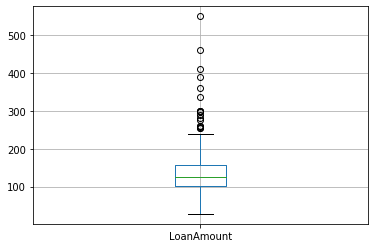

In [177]:
df1.boxplot(column = 'LoanAmount')

In [178]:
#log transformation
df1['LoanAmount_1'] = np.log(df1['LoanAmount'])

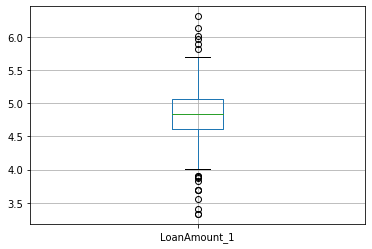

In [179]:
df1.boxplot(column = 'LoanAmount_1')

In [180]:
df1['Loan_Amount_Term'].describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

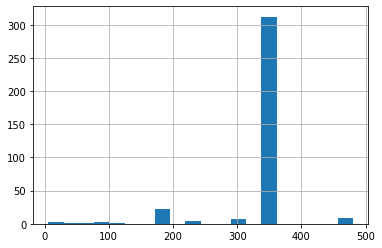

In [181]:
df1['Loan_Amount_Term'].hist(bins = 20)

In [182]:
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(),inplace=True)

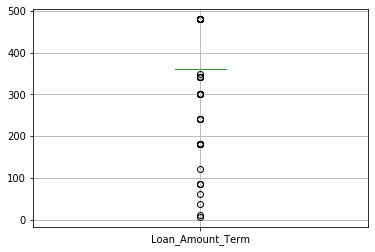

In [183]:
df1.boxplot(column = 'Loan_Amount_Term')

In [184]:
#log transformation
df1['Loan_Amount_Term_1'] = np.log(df1['Loan_Amount_Term'])

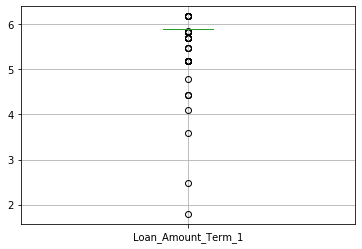

In [185]:
df1.boxplot(column = 'Loan_Amount_Term_1')

In [186]:
df1['Credit_History'].describe()

count    338.000000
mean       0.825444
std        0.380150
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

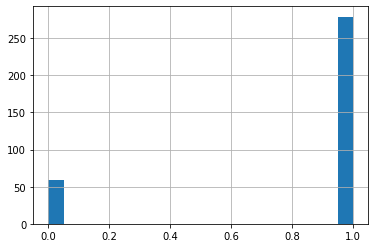

In [187]:
df1['Credit_History'].hist(bins = 20)

In [188]:
df1['Credit_History'].fillna(df1['Credit_History'].mean(),inplace=True)

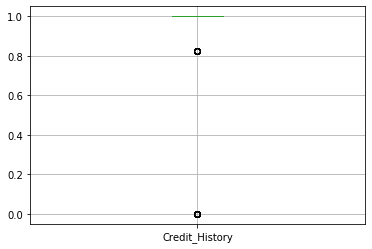

In [189]:
df1.boxplot(column = 'Credit_History')

In [190]:
#to check null values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_1          0
Loan_Amount_Term_1    0
dtype: int64

In [191]:
df.dtypes

Loan_ID                object
Gender                  int32
Married                 int32
Dependents             object
Education              object
Self_Employed           int32
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_1          float64
Loan_Amount_Term_1    float64
dtype: object

In [192]:
#to check null values
df1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
LoanAmount_1          0
Loan_Amount_Term_1    0
dtype: int64

In [193]:
df1.dtypes

Loan_ID                object
Gender                  int32
Married                object
Dependents             object
Education              object
Self_Employed           int32
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
LoanAmount_1          float64
Loan_Amount_Term_1    float64
dtype: object

In [194]:
df['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [195]:
#encoding the target variable
encode = LabelEncoder()
df.Education = encode.fit_transform(df.Education)

In [196]:
df['Property_Area'].describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [197]:
#encoding the target variable
encode = LabelEncoder()
df.Property_Area = encode.fit_transform(df.Property_Area)

In [198]:
#encoding the target variable
encode = LabelEncoder()
df.Dependents = encode.fit_transform(df.Dependents)

In [199]:
df['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

In [200]:
#encoding the target variable
encode = LabelEncoder()
df.Loan_Status = encode.fit_transform(df.Loan_Status)

In [201]:
df1['Married'].describe()

count     367
unique      2
top       Yes
freq      233
Name: Married, dtype: object

In [202]:
#encoding the target variable
encode = LabelEncoder()
df1.Married = encode.fit_transform(df1.Married)

In [203]:
df1['Education'].describe()

count          367
unique           2
top       Graduate
freq           283
Name: Education, dtype: object

In [204]:
#encoding the target variable
encode = LabelEncoder()
df1.Education = encode.fit_transform(df1.Education)

In [205]:
df1['Property_Area'].describe()

count       367
unique        3
top       Urban
freq        140
Name: Property_Area, dtype: object

In [206]:
#encoding the target variable
encode = LabelEncoder()
df1.Property_Area = encode.fit_transform(df1.Property_Area)

In [207]:
#encoding the target variable
encode = LabelEncoder()
df1.Dependents = encode.fit_transform(df1.Dependents)

In [208]:
df.dtypes

Loan_ID                object
Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int32
Loan_Status             int32
LoanAmount_1          float64
Loan_Amount_Term_1    float64
dtype: object

In [209]:
df1.dtypes

Loan_ID                object
Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int32
LoanAmount_1          float64
Loan_Amount_Term_1    float64
dtype: object

In [210]:
#dropping the columns 
df=df.drop(['Loan_Amount_Term','LoanAmount'],axis=1)

In [211]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_1',
       'Loan_Amount_Term_1'],
      dtype='object')

In [212]:
#dropping these columns which are not useful
df1=df1.drop(['Loan_Amount_Term','LoanAmount'],axis=1)

In [213]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Credit_History', 'Property_Area', 'LoanAmount_1',
       'Loan_Amount_Term_1'],
      dtype='object')

In [222]:
#seperating target variable from the target variable and independent variable from the training data
train_x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [223]:
train_y=df['Loan_Status']

In [225]:
test_y=df1['Loan_ID']

In [224]:
test_x=df1.drop(columns=['Loan_ID'],axis=1)

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [247]:
# create the object of the model
model = LinearRegression()

In [248]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [249]:
y_pred = model.predict(train_x)

In [250]:
y_pred

array([0.75804368, 0.82262493, 0.89706083, 0.79745409, 0.75895194,
       0.82209709, 0.80955289, 0.34951664, 0.85043097, 0.74597709,
       0.8806232 , 0.86165219, 0.80396191, 0.7115607 , 0.93155599,
       0.76318839, 0.23200125, 0.33144289, 0.76930074, 0.8571781 ,
       0.33794313, 0.80853978, 0.30772708, 0.28151446, 0.3546701 ,
       0.84276895, 0.84356345, 0.79972233, 0.7360262 , 0.7529746 ,
       0.36278643, 0.77920574, 0.72873564, 0.84860813, 0.66197415,
       0.85945107, 0.40144436, 0.87089661, 0.70666568, 0.67238837,
       0.77667793, 0.78509177, 0.41687697, 0.83944621, 0.82049965,
       0.80234463, 0.8994325 , 0.87016875, 0.40902929, 0.75369839,
       0.81593575, 0.77420739, 0.77511729, 0.86599033, 0.39887248,
       0.84976824, 0.85503006, 0.82135275, 0.8439198 , 0.78130453,
       0.85358644, 0.87211781, 0.27973485, 0.35406707, 0.29993735,
       0.80523555, 0.21835486, 0.84094148, 0.82044911, 0.29543112,
       0.84774754, 0.7834916 , 0.75926625, 0.31347565, 0.82481

In [251]:
model.coef_

array([-2.75383166e-02,  1.11642276e-01, -3.60591918e-03, -6.53412459e-02,
        2.91025111e-03, -8.68993026e-07, -6.45412227e-06,  4.74267125e-01,
        1.92657055e-02, -2.75974623e-02, -1.15727178e-02])

In [252]:
model.intercept_

0.4835971169473718

In [237]:
from sklearn.linear_model import LogisticRegression


In [238]:
#fitting the logistic regression model to the train data
model_lr=LogisticRegression()

In [239]:
model_lr.fit(train_x,train_y)

c:\users\rohith\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
#coefficients of the model
print('Coefficient of the model:',model_lr.coef_)

Coefficient of the model: [[ 3.98742786e-03  4.68653197e-01  1.09125688e-02 -3.55625388e-01
  -1.39602135e-03 -3.73845582e-06 -3.57438783e-05  1.98561225e+00
   1.00962231e-01 -1.51766712e-01 -3.32882878e-02]]


In [241]:
#Intercept of the model
print('Intercept of the model:',model_lr.intercept_)

Intercept of the model: [0.00709374]


In [242]:
#predict the target variable in the train data
predict_train=model_lr.predict(train_x)
print('Target on the train data:',predict_train)

Target on the train data: [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1

In [245]:
#Accuracy score on the test dataset
accuracy = metrics.accuracy_score(predict_train,train_y)
print('Accuracy:',accuracy)

Accuracy: 0.7703583061889251


In [256]:
#cross_val_score gives us the cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [257]:
#Perform k-fold cross-validation with 5 folds
kf = KFold(n_splits=5) 

score=cross_val_score(LogisticRegression(),train_x,train_y,cv=5)

c:\users\rohith\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rohith\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rohith\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rohith\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rohith\appdata\local\programs\pytho

In [260]:
#predicting the target values 
predict_test=model_lr.predict(test_x)
print(predict_test)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [261]:
predict_test=pd.DataFrame(data=predict_test,columns=['Loan_Status'])
predict_test_1=pd.concat([test_y,predict_test],axis=1)
print(predict_test_1)

      Loan_ID  Loan_Status
0    LP001015            1
1    LP001022            1
2    LP001031            1
3    LP001035            1
4    LP001051            1
..        ...          ...
362  LP002971            1
363  LP002975            1
364  LP002980            1
365  LP002986            1
366  LP002989            1

[367 rows x 2 columns]


In [262]:
#replace 1 with Y
predict_test_1=predict_test_1.replace(1,'Y')

In [263]:
#replacing 0 with N
predict_test_1=predict_test_1.replace(0,'N')

In [264]:
predict_test_1

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [265]:
#exporting the target varibale
predict_test = predict_test_1.to_csv (r'D:\machine learning\Loan Prediction\predict_test.csv', index = None, header=True)